In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df=df.drop_duplicates()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


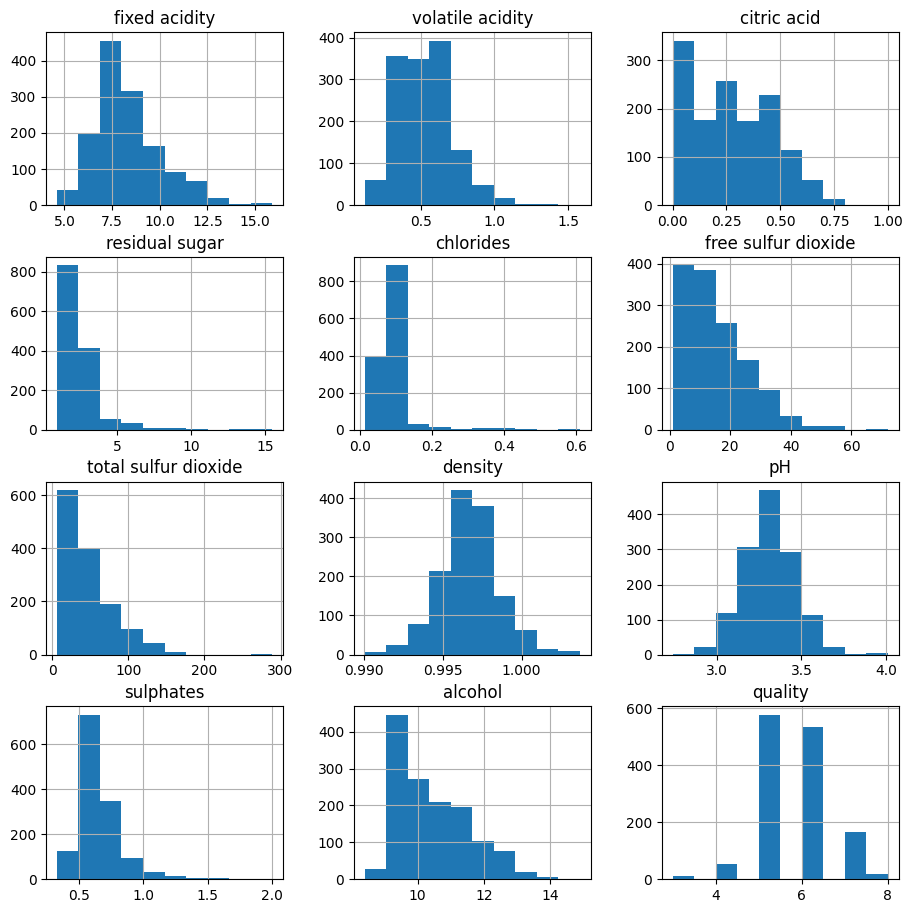

In [8]:
df.hist(figsize=(11,11));
plt.show()

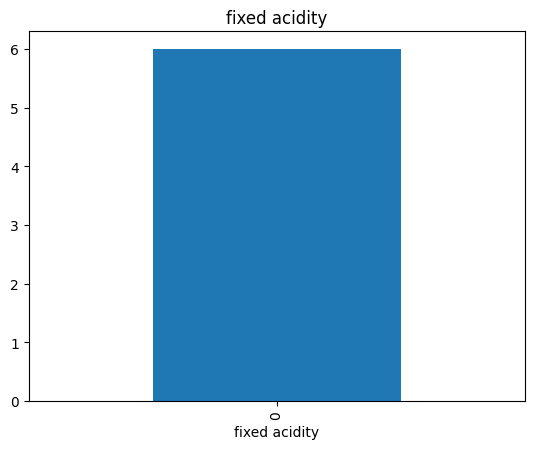

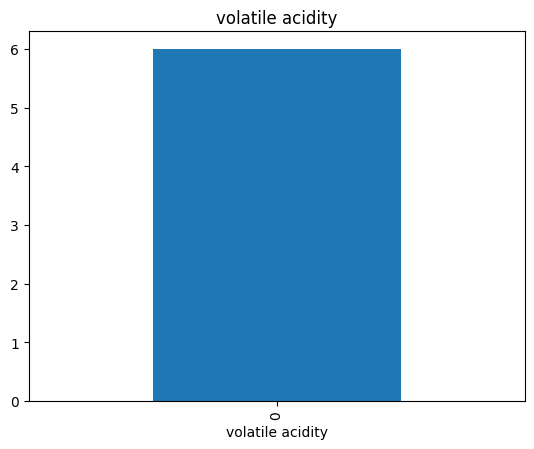

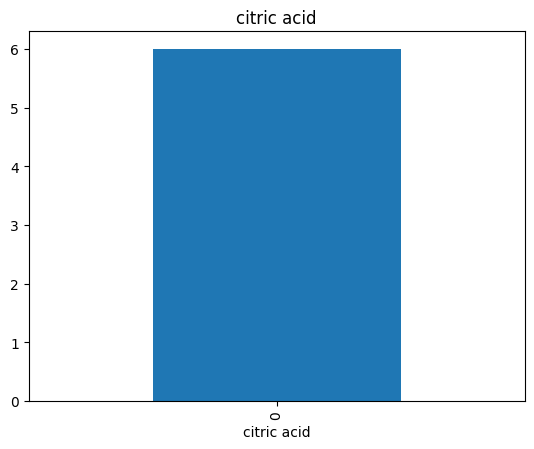

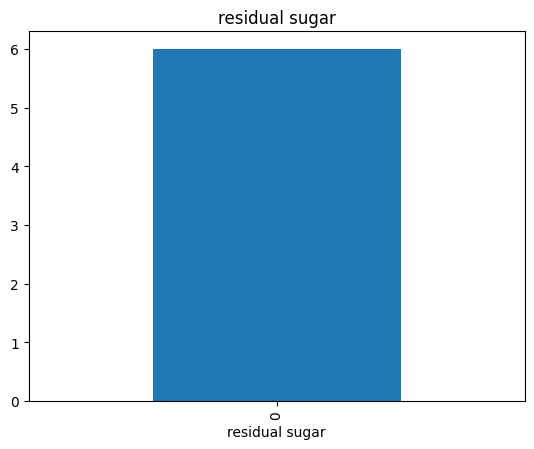

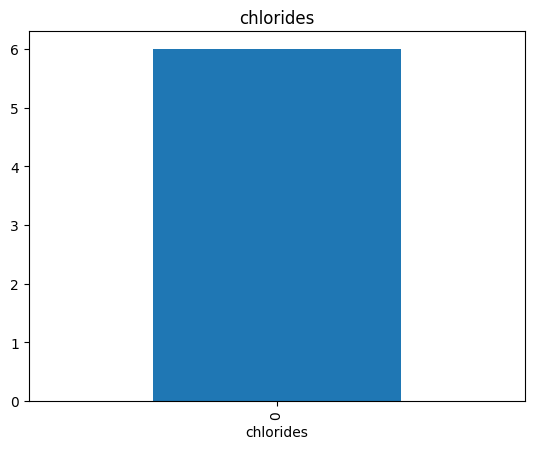

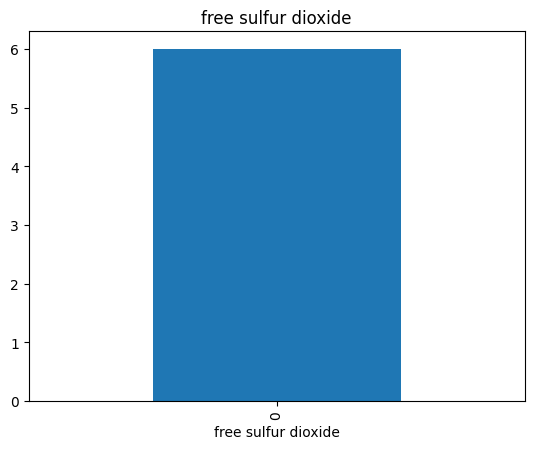

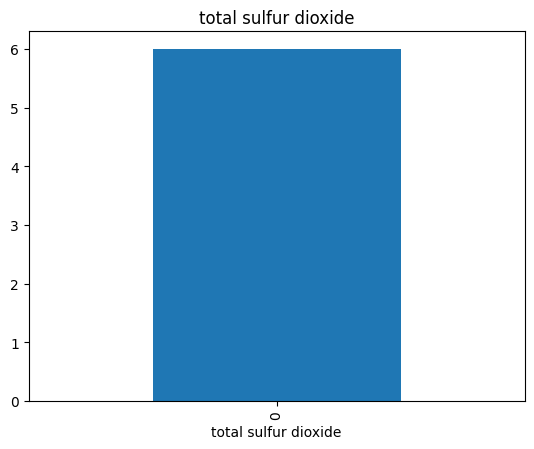

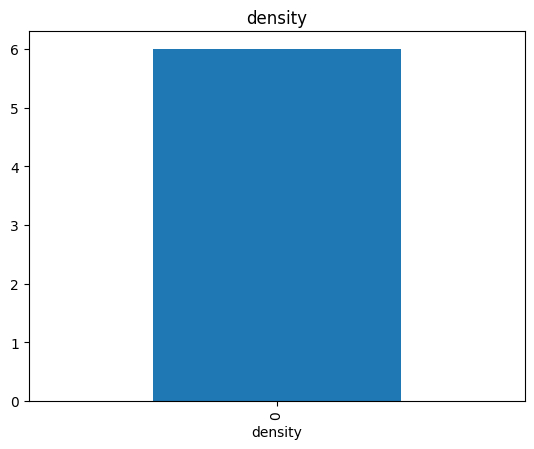

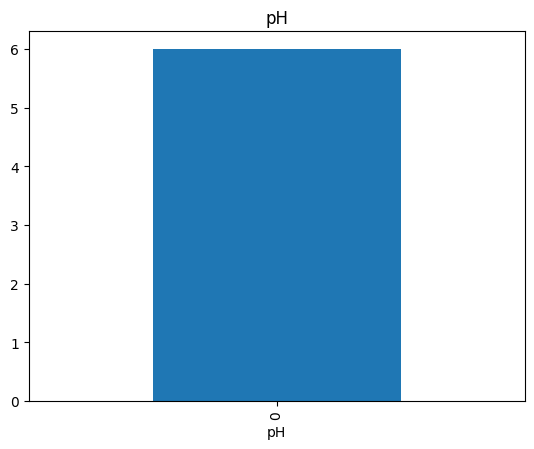

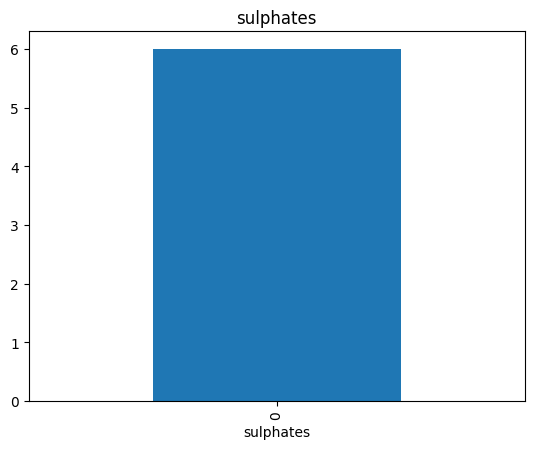

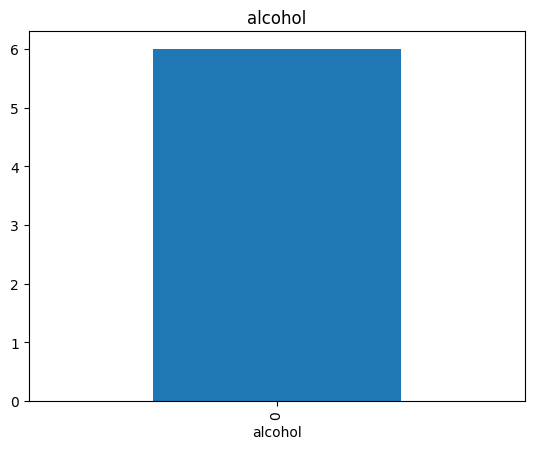

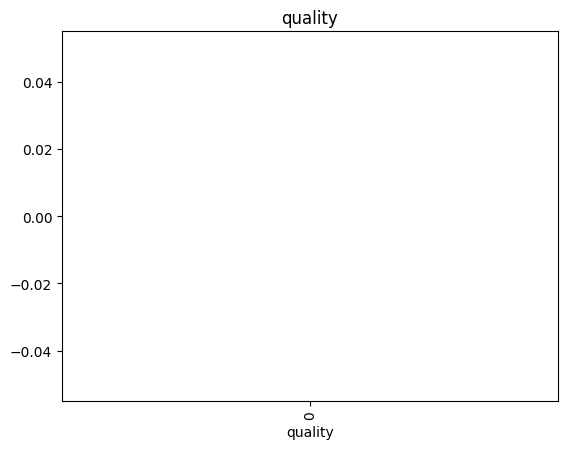

In [9]:
for feature in df.columns:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['quality'].median().plot.bar()
    plt.title(feature)
    plt.show()


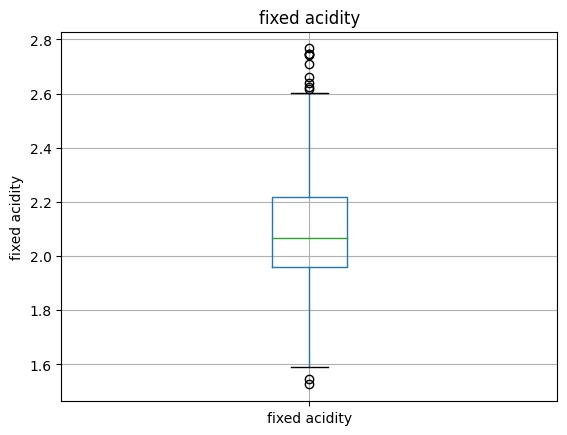

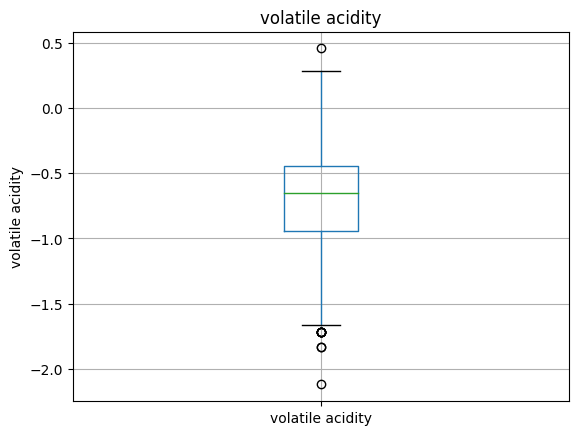

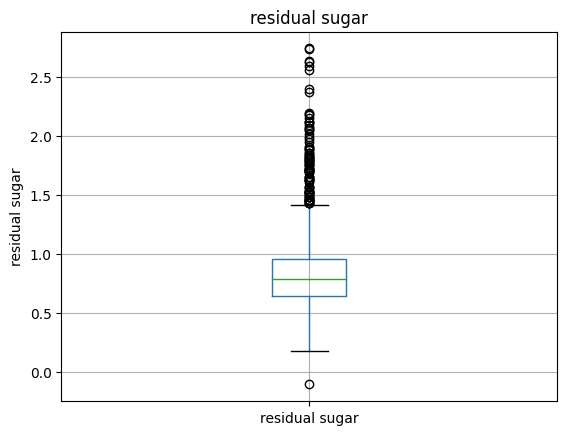

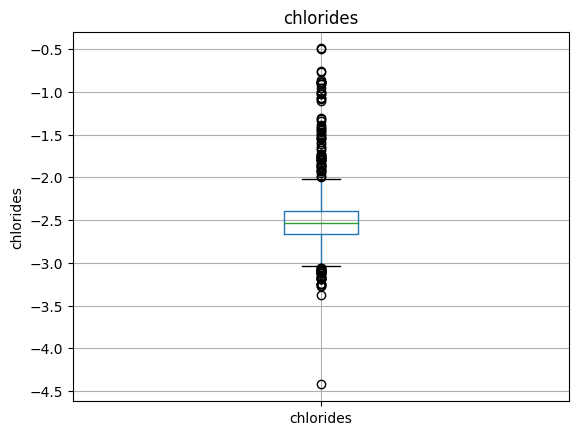

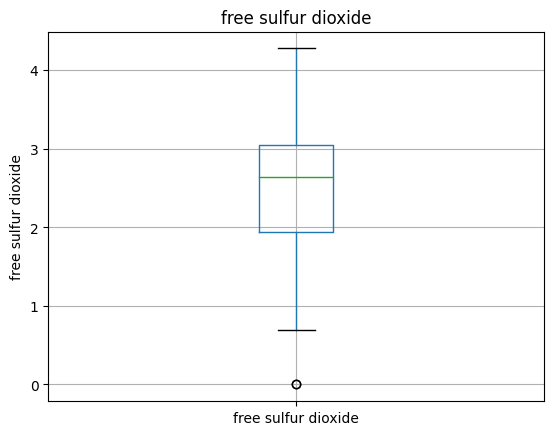

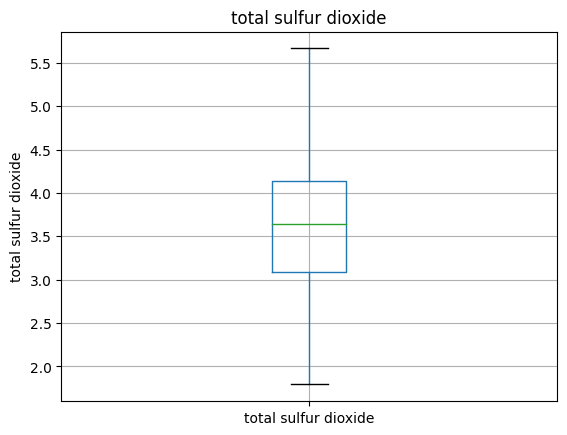

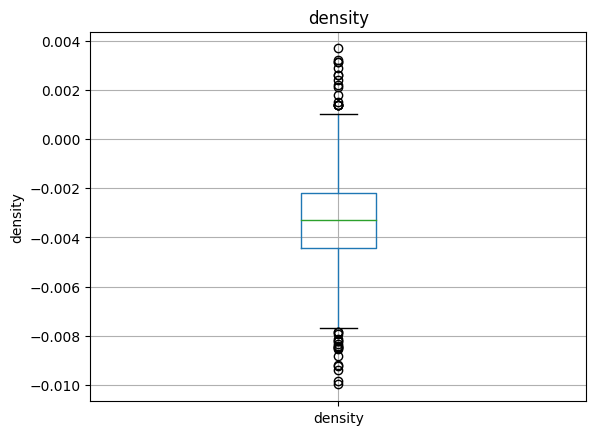

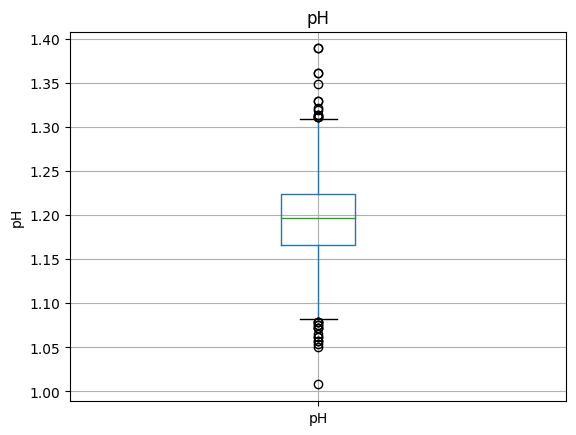

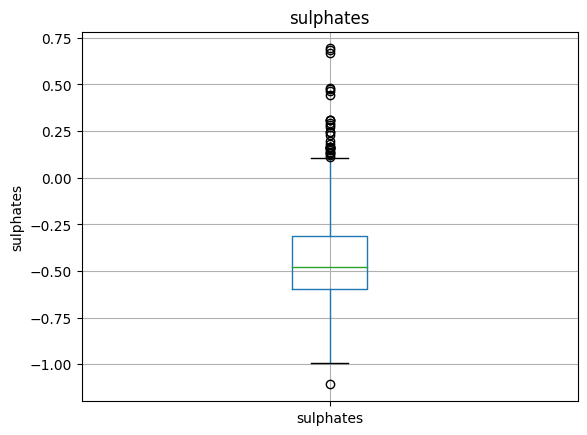

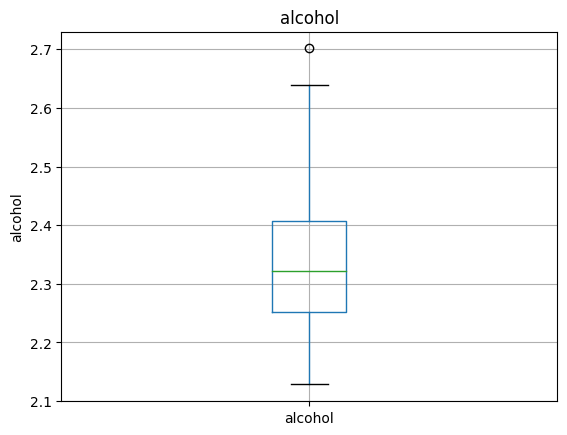

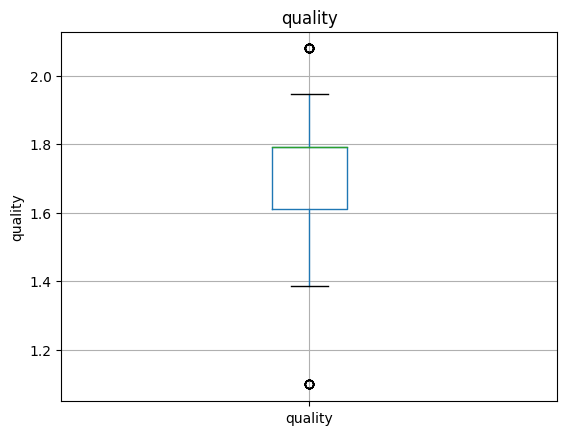

In [10]:
for feature in df.columns:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
            data[feature] = pd.to_numeric(data[feature], errors='coerce')
            data[feature]=np.log(data[feature])
            data.boxplot(column=feature)
            plt.ylabel(feature)
            plt.title(feature)
            plt.show()
        

In [11]:
def remove_outliers_iqr(data, column, threshold=1.5):
    Q1, Q3 = np.percentile(df, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data
columns_to_process = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for column in columns_to_process:
    df = remove_outliers_iqr(df, column)


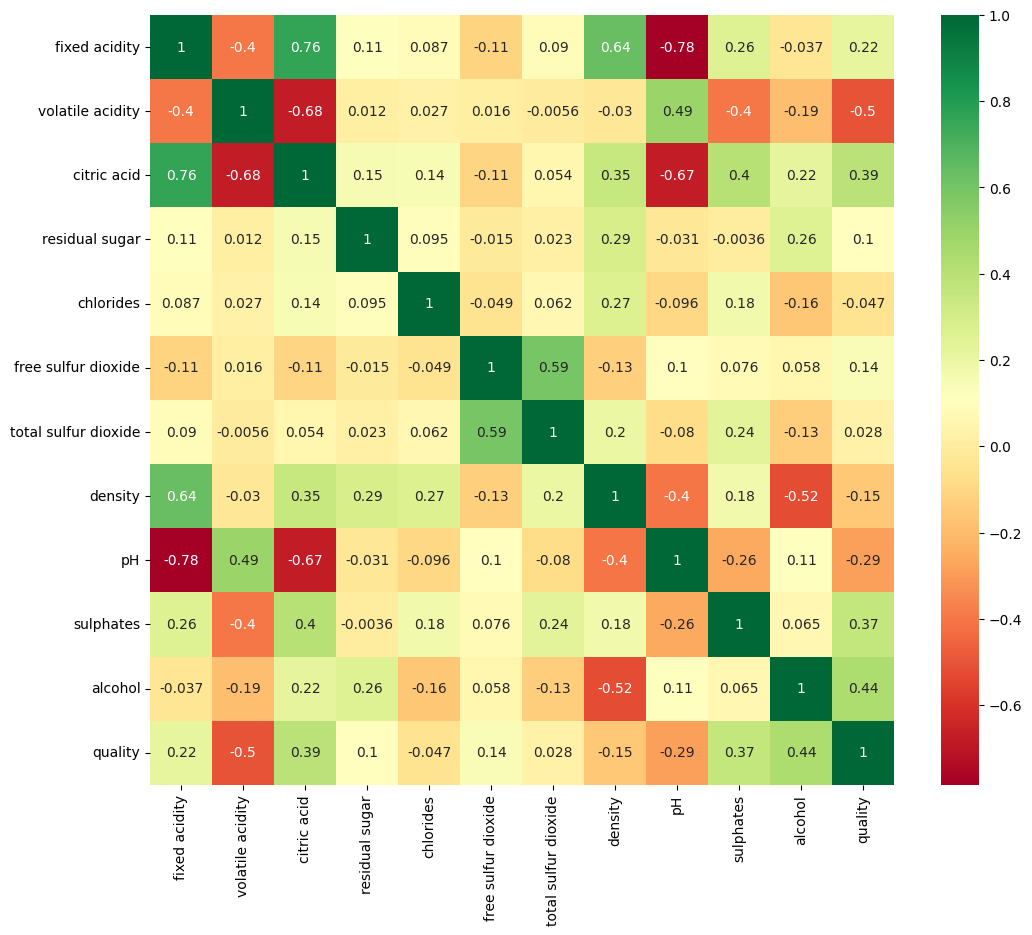

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [13]:
X=df.drop('quality',axis=1)
y=df['quality']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=60)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
rg=Ridge()
lr= LinearRegression()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [15]:
rg.fit(X_train,y_train)
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred=lr.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Squared Error: 0.4412594859615495
R-squared Score: 0.45895865385343215


In [17]:
y_pred=rg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predicted values
y_pred = rg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Squared Error: 0.43946615081509494
R-squared Score: 0.4611575152776016


In [18]:
 from sklearn.linear_model import Ridge
rg=Ridge()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # You can adjust the alpha values
}
model=GridSearchCV(rg,param_grid,cv=10)

In [19]:
model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [20]:
model.best_params_

{'alpha': 100}

In [21]:
best_model = model.best_estimator_

In [22]:
y_pred=best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.4507547539680208


In [23]:
from sklearn.svm import SVR

svr = SVR()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}

grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_


print("Best Parameters:", best_params)
print("Best Score:", best_score)
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.3087137317094875
Mean Squared Error: 0.46402936777149045
R-squared Score: 0.4310398262746813


In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_regressor = RandomForestRegressor(random_state=42)


rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(rf_regressor, param_grid=rf_param_grid, cv=5, n_jobs=-1)

rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)
rf_predictions = rf_grid_search.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Best Parameters:", rf_best_params)
print("Random Forest Best Score:", rf_best_score)
print("Random Forest Mean Squared Error:", rf_mse)
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_grid_search = GridSearchCV(gb_regressor, param_grid=gb_param_grid, cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)
gb_predictions = gb_grid_search.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print("Gradient Boosting Best Parameters:", gb_best_params)
print("Gradient Boosting Best Score:", gb_best_score)
print("Gradient Boosting Mean Squared Error:", gb_mse)

R-squared Score: 0.4310398262746813
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best Score: 0.3117130528874224
Random Forest Mean Squared Error: 0.5593352297520588
R-squared Score: 0.4310398262746813
Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Gradient Boosting Best Score: 0.30516197649181953
Gradient Boosting Mean Squared Error: 0.5801329549966768


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb_grid_search = GridSearchCV(gb_regressor, param_grid=gb_param_grid, cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)
gb_predictions = gb_grid_search.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print("Gradient Boosting Best Parameters:", gb_best_params)
print("Gradient Boosting Best Score:", gb_best_score)
print("Gradient Boosting Mean Squared Error:", gb_mse)

R-squared Score: 0.4310398262746813
Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Gradient Boosting Best Score: 0.30516197649181953
Gradient Boosting Mean Squared Error: 0.5801329549966768


In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)
predictions = grid_search.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Mean Squared Error:", mse)

R-squared Score: 0.4310398262746813
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.30516197649181953
Mean Squared Error: 0.5801329549966768


In [ ]:
import pickle
pickle.dump(rg,open('model.pkl','wb'))